In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

#Import API Key
from api_keys import weather_api_key

#Incorporated citipy to detemine the city based on latitude and logitude
from citipy import citipy

#Output Data File (CSV)
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)

#Idnetify nearest city for each lat, lng comination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)

615

## Perform API Calls
    * Perform a weather check on each city using a series of successive API calls
    * Include a print log of each city as it's being processed (with the city number and city name)

In [3]:
weather_url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key

city = "houston"

In [4]:
weather_data = requests.get(f"{weather_url}&q={city}").json()

weather_data

{'coord': {'lon': -95.36, 'lat': 29.76},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 70.23,
  'feels_like': 63.1,
  'temp_min': 69.01,
  'temp_max': 72,
  'pressure': 1014,
  'humidity': 35},
 'visibility': 16093,
 'wind': {'speed': 9.17, 'deg': 230, 'gust': 19.46},
 'clouds': {'all': 1},
 'dt': 1581116061,
 'sys': {'type': 1,
  'id': 3370,
  'country': 'US',
  'sunrise': 1581080867,
  'sunset': 1581120202},
 'timezone': -21600,
 'id': 4699066,
 'name': 'Houston',
 'cod': 200}

In [5]:
#Create lists for each data point needed
temperature = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
longitude = []
country = []
date = []
cities_f = []

#Start record count at 1
record = 1

print("Beginning Data Retrieval")
print("------------------------")

#run loop through API for all cities in the list
for city in cities:
    try:
        pull = requests.get(f"{weather_url}&q={city}").json()
        temperature.append(pull["main"]["temp_max"])
        humidity.append(pull["main"]["humidity"])
        cloudiness.append(pull["clouds"]["all"])
        wind_speed.append(pull["wind"]["speed"])
        latitude.append(pull["coord"]["lat"])
        longitude.append(pull["coord"]["lon"])
        country.append(pull["sys"]["country"])
        date.append(pull["dt"])
        cities_f.append(city)        
        print(f"Processing Record {record} | {city}")
        record = record + 1
    except:
        print("City not found. Skipping...")
    continue

print("------------------------")
print("Data Retrival Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 | paamiut
Processing Record 2 | hobart
City not found. Skipping...
Processing Record 3 | norman wells
Processing Record 4 | cape town
Processing Record 5 | narsaq
Processing Record 6 | bluff
Processing Record 7 | dawei
Processing Record 8 | ilulissat
Processing Record 9 | valparaiso
Processing Record 10 | cairns
Processing Record 11 | touros
Processing Record 12 | hargeysa
Processing Record 13 | nikolskoye
Processing Record 14 | araouane
Processing Record 15 | aykhal
Processing Record 16 | jamestown
Processing Record 17 | geraldton
Processing Record 18 | butaritari
City not found. Skipping...
Processing Record 19 | avarua
Processing Record 20 | castro
Processing Record 21 | bijar
Processing Record 22 | laguna
City not found. Skipping...
Processing Record 23 | hilo
Processing Record 24 | saint-philippe
Processing Record 25 | cabo san lucas
Processing Record 26 | constitucion
Processing Record 27 | jacmel
Processing Re

## Convert Raw Data to DataFrame

In [6]:
weather_df = pd.DataFrame({"City": cities_f,
                          "Cloudiness": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Lat": latitude,
                          "Lng": longitude,
                          "Max Temp": temperature,
                          "Wind Speed": wind_speed})

weather_df.to_csv("CSV/weather_data.csv")

weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,paamiut,22,GL,1581116238,77,61.99,-49.67,9.75,13.58
1,hobart,75,AU,1581116031,72,-42.88,147.33,61.00,5.82
2,norman wells,90,CA,1581116239,76,65.28,-126.83,-5.80,8.05
3,cape town,0,ZA,1581116239,68,-33.93,18.42,68.00,9.17
4,narsaq,0,GL,1581116239,56,60.92,-46.05,15.80,8.05
...,...,...,...,...,...,...,...,...,...
560,mildura,0,AU,1581116380,50,-34.20,142.15,81.00,12.75
561,antalaha,0,MG,1581116380,73,-14.90,50.28,78.64,10.51
562,montbrison,100,FR,1581116381,75,45.67,4.08,42.80,4.70
563,dunedin,80,NZ,1581116296,60,-45.87,170.50,52.99,27.22


## Plotting the Data

#### Latitude vs. Temperature Plot

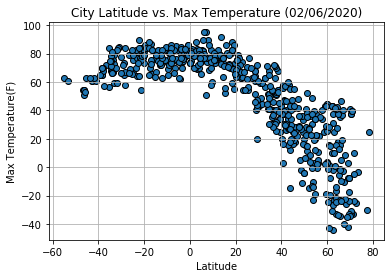

In [7]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker ="o", edgecolors="black")

plt.title("City Latitude vs. Max Temperature (02/06/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()

plt.savefig("Figure/City_Latitude_vs_Max_Temp.png")

plt.show()

* On average, we see that cities that are closer to 0 latitude have significantly higher temeperatures than cities that are further away. 

## Latitude vs. Humidity Plot

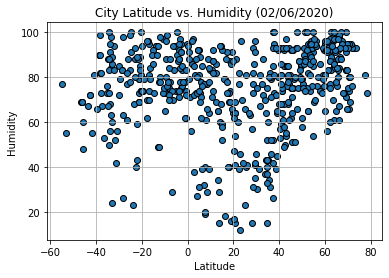

In [8]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker ="o", edgecolors="black")

plt.title("City Latitude vs. Humidity (02/06/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.savefig("Figure/City_Latitude_vs_Humidity.png")

plt.show()

* We see a larger cluster of cities that are further away from the equator have higher amounts of humidity

## Latitude vs Cloudiness Plot

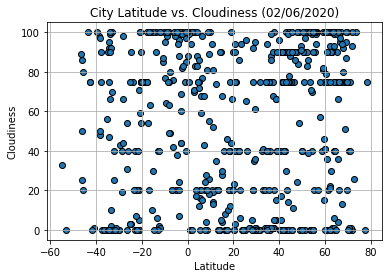

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker ="o", edgecolors="black")

plt.title("City Latitude vs. Cloudiness (02/06/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.savefig("Figure/City_Latitude_vs_Cloudiness.png")

plt.show()

## Latitude vs Wind Speed Plot

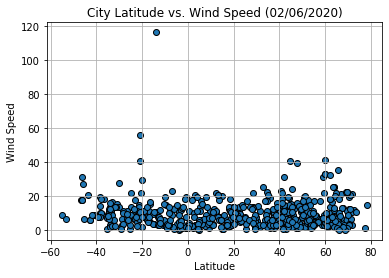

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker ="o", edgecolors="black")

plt.title("City Latitude vs. Wind Speed (02/06/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.savefig("Figure/City_Latitude_vs_Wind Speed.png")

plt.show()

## Linear Regression

In [11]:
#Create Northern and Souther Hemisphere DataFrames
n_hem = weather_df[weather_df["Lng"] >= 0]
s_hem = weather_df[weather_df["Lng"] < 0]



## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

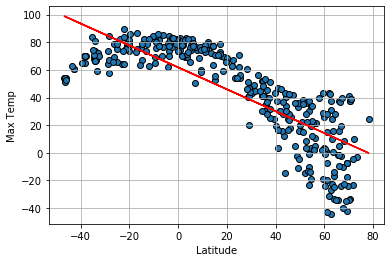

The r-squared is: 0.6539262930014156


In [12]:
#Northern Hemisphere - Max Temp vs Latitude Linear Regression
tempvlat_r2 = (linregress(n_hem["Lat"], n_hem["Max Temp"]).rvalue)**2

plt.scatter(n_hem["Lat"], n_hem["Max Temp"], marker ="o", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()

#Plot Trendline
z = np.polyfit(n_hem["Lat"], n_hem["Max Temp"], 1)
p = np.poly1d(z)
plt.plot(n_hem["Lat"],p(n_hem["Lat"]),"r-")

plt.savefig("Figure/N_Temp_vs_Lat.png")

plt.show()
print(f"The r-squared is: {tempvlat_r2}")

## Southern Hemisphere - Max Temp vs. Latitude

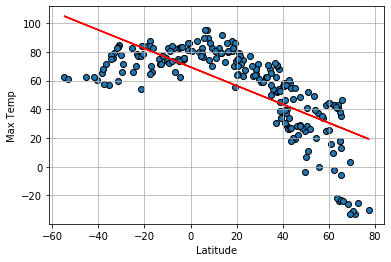

The r-squared is: 0.5179960712454262


In [13]:
#Southerm Hemisphere - Max Temp vs Latitude Linear Regression
s_tempvlat_r2 = (linregress(s_hem["Lat"], s_hem["Max Temp"]).rvalue)**2

plt.scatter(s_hem["Lat"], s_hem["Max Temp"], marker ="o", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()

#Plot Trendline
z = np.polyfit(s_hem["Lat"], s_hem["Max Temp"], 1)
p = np.poly1d(z)
plt.plot(s_hem["Lat"],p(s_hem["Lat"]),"r-")

plt.savefig("Figure/S_Temp_vs_Lat.png")

plt.show()
print(f"The r-squared is: {s_tempvlat_r2}")

## Northern Hemisphere - Humidity (%) vs Latitude Linear Regression

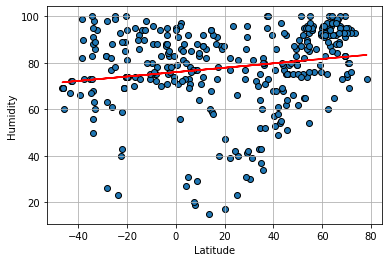

The r-squared is: 0.034612134206127076


In [14]:
#Northern Hemisphere - Humidity vs Latitude Linear Regression
n_humidityvlat_r2 = (linregress(n_hem["Lat"], n_hem["Humidity"]).rvalue)**2

plt.scatter(n_hem["Lat"], n_hem["Humidity"], marker ="o", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

#Plot Trendline
z = np.polyfit(n_hem["Lat"], n_hem["Humidity"], 1)
p = np.poly1d(z)
plt.plot(n_hem["Lat"],p(n_hem["Lat"]),"r-")

plt.savefig("Figure/N_Humidity_vs_Lat.png")

plt.show()
print(f"The r-squared is: {n_humidityvlat_r2}")

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

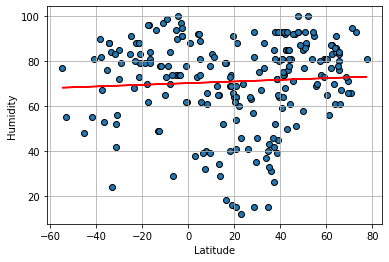

The r-squared is: 0.0036133675650716858


In [15]:
#Southern Hemisphere - Humidity vs Latitude Linear Regression
s_humidityvlat_r2 = (linregress(s_hem["Lat"], s_hem["Humidity"]).rvalue)**2

plt.scatter(s_hem["Lat"], s_hem["Humidity"], marker ="o", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

#Plot Trendline
z = np.polyfit(s_hem["Lat"], s_hem["Humidity"], 1)
p = np.poly1d(z)
plt.plot(s_hem["Lat"],p(s_hem["Lat"]),"r-")

plt.savefig("Figure/S_Humidity_vs_Lat.png")

plt.show()
print(f"The r-squared is: {s_humidityvlat_r2}")

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

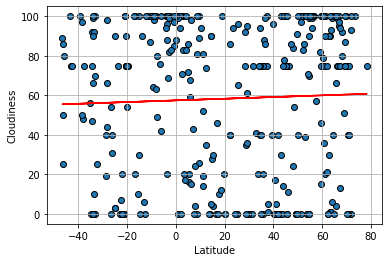

The r-squared is: 0.0014331504961893613


In [16]:
#Northern Hemisphere - Cloudiness vs Latitude Linear Regression
n_cloudinessvlat_r2 = (linregress(n_hem["Lat"], n_hem["Cloudiness"]).rvalue)**2

plt.scatter(n_hem["Lat"], n_hem["Cloudiness"], marker ="o", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

#Plot Trendline
z = np.polyfit(n_hem["Lat"], n_hem["Cloudiness"], 1)
p = np.poly1d(z)
plt.plot(n_hem["Lat"],p(n_hem["Lat"]),"r-")

plt.savefig("Figure/N_Cloudiness_vs_Lat.png")

plt.show()
print(f"The r-squared is: {n_cloudinessvlat_r2}")

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

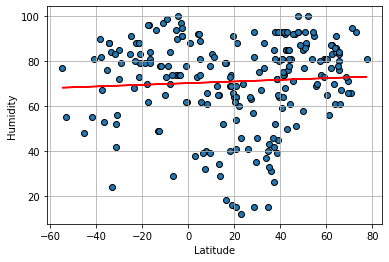

The r-squared is: 0.0036133675650716858


In [17]:
#Southern Hemisphere - Humidity vs Latitude Linear Regression
s_cloudinessvlat_r2 = (linregress(s_hem["Lat"], s_hem["Humidity"]).rvalue)**2

plt.scatter(s_hem["Lat"], s_hem["Humidity"], marker ="o", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

#Plot Trendline
z = np.polyfit(s_hem["Lat"], s_hem["Humidity"], 1)
p = np.poly1d(z)
plt.plot(s_hem["Lat"],p(s_hem["Lat"]),"r-")

plt.savefig("Figure/S_Cloudiness_vs_Lat.png")

plt.show()
print(f"The r-squared is: {s_cloudinessvlat_r2}")

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

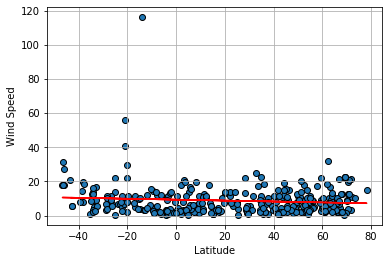

The r-squared is: 0.010954056568455826


In [18]:
#Northern Hemisphere - Cloudiness vs Latitude Linear Regression
n_windvlat_r2 = (linregress(n_hem["Lat"], n_hem["Wind Speed"]).rvalue)**2

plt.scatter(n_hem["Lat"], n_hem["Wind Speed"], marker ="o", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

#Plot Trendline
z = np.polyfit(n_hem["Lat"], n_hem["Wind Speed"], 1)
p = np.poly1d(z)
plt.plot(n_hem["Lat"],p(n_hem["Lat"]),"r-")

plt.savefig("Figure/N_Wind_vs_Lat.png")

plt.show()
print(f"The r-squared is: {n_windvlat_r2}")

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

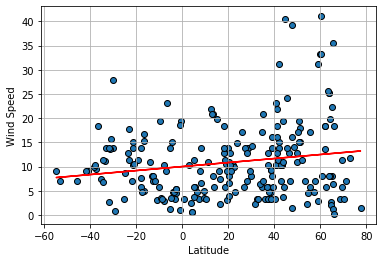

The r-squared is: 0.030508222265839116


In [19]:
#Southern Hemisphere - Humidity vs Latitude Linear Regression
s_windvlat_r2 = (linregress(s_hem["Lat"], s_hem["Wind Speed"]).rvalue)**2

plt.scatter(s_hem["Lat"], s_hem["Wind Speed"], marker ="o", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

#Plot Trendline
z = np.polyfit(s_hem["Lat"], s_hem["Wind Speed"], 1)
p = np.poly1d(z)
plt.plot(s_hem["Lat"],p(s_hem["Lat"]),"r-")

plt.savefig("Figure/S_Wind_vs_Lat.png")

plt.show()
print(f"The r-squared is: {s_windvlat_r2}")